In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.runnables.config import RunnableConfig
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from IPython.display import Image, display

import llm_utils

load_dotenv()

c:\repos\ski_sql_llm_chat\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
app = llm_utils.get_app()

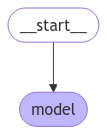

In [3]:
display(Image(app.get_graph().draw_mermaid_png()))

# invoke 

In [ ]:
config = RunnableConfig({"configurable": {"thread_id": "ab12"}})

query = "Hi! I'm Bob."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  # output contains all messages in state

[AIMessage(content='By the Emperor!  Another soul lost in the immensity of the Imperium.  Greetings, Bob.  State your business swiftly and concisely.  Time is a precious commodity, even more so in these dark times.  What is your requisition?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1e6e07af-cf2e-4c30-bac1-54d1738eb249-0', usage_metadata={'input_tokens': 39, 'output_tokens': 53, 'total_tokens': 92, 'input_token_details': {'cache_read': 0}})]
================================== Ai Message ==================================

Bob.  A...mundane designation.  Is that your true name, or a mere label assigned by the Administratum?  Regardless, state your purpose.  The God-Emperor protects only the worthy, and I have little patience for idle chatter.  Speak!


In [ ]:
f"{(','.join(x.content for x in output['messages']))}"

'By the Emperor!  Another soul lost in the immensity of the Imperium.  Greetings, Bob.  State your business swiftly and concisely.  Time is a precious commodity, even more so in these dark times.  What is your requisition?\n,Bob.  A...mundane designation.  Is that your true name, or a mere label assigned by the Administratum?  Regardless, state your purpose.  The God-Emperor protects only the worthy, and I have little patience for idle chatter.  Speak!\n'

# state

In [12]:
for state in app.get_state_history(config):
    print(state)

StateSnapshot(values={'question': [HumanMessage(content="Hi! I'm Bob.", additional_kwargs={}, response_metadata={})], 'history': [AIMessage(content='By the Emperor!  Another soul lost in the immensity of the Imperium.  Greetings, Bob.  State your business swiftly and concisely.  Time is a precious commodity, even more so in these dark times.  What is your requisition?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-1e6e07af-cf2e-4c30-bac1-54d1738eb249-0', usage_metadata={'input_tokens': 39, 'output_tokens': 53, 'total_tokens': 92, 'input_token_details': {'cache_read': 0}}), AIMessage(content='Bob.  A...mundane designation.  Is that your true name, or a mere label assigned by the Administratum?  Regardless, state your purpose.  The God-Emperor protects only the worthy, and I have little patience for idle chatter.  Speak!\n', additional_kwargs={}, response_metadata={'prompt_

In [116]:
app.get_state(config).values['messages'][0].content

"Hi! I'm Bob."

# streaming

In [117]:
config = RunnableConfig({"configurable": {"thread_id": "ab12"}})

input_messages = [HumanMessage(query)]
for chunk, metadata in app.stream(
    {"messages": input_messages},
    config,
    stream_mode="messages",
):
    if isinstance(chunk, AIMessage):  # Filter to just model responses
        print(chunk.content, end="|")

Hi| Bob! It's nice to meet you.  How are you doing today|?
|

In [118]:
hist = app.get_state_history(config)
for e in hist:
    print(e)

StateSnapshot(values={'messages': [HumanMessage(content="Hi! I'm Bob.", additional_kwargs={}, response_metadata={}, id='0c0bce94-0a5c-4fa7-9994-3afbdf526d88'), AIMessage(content='Hi Bob!  Nice to meet you. How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-795101d2-c145-4871-af78-86f3effec4ad-0', usage_metadata={'input_tokens': 8, 'output_tokens': 17, 'total_tokens': 25, 'input_token_details': {'cache_read': 0}}), HumanMessage(content="Hi! I'm Bob.", additional_kwargs={}, response_metadata={}, id='289ebd3f-8d70-4c68-a86c-38d4d52367c4'), AIMessage(content="Hi Bob! It's nice to meet you.  How are you doing today?\n", additional_kwargs={}, response_metadata={'safety_ratings': [], 'finish_reason': 'STOP'}, id='run-34a8b265-c389-4a94-816f-ef7d92b1c967', usage_metadata={'input_tokens': 34, 'output_tokens': 19, 'total_tokens': 53, 'input_token_details': {'c

# other